<a href="https://colab.research.google.com/github/MoonlightO2/Python-Web-Scraping---BBC-News-Dataset/blob/main/Python_Web_Scraping_BBC_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Web Scraping - BBC News Dataset**
Date: 2023-12-12

https://www.bbc.co.uk/,
https://www.bbc.co.uk/news,
https://www.bbc.co.uk/news/uk,
https://www.bbc.co.uk/news/england,
https://www.bbc.co.uk/news/scotland,
https://www.bbc.co.uk/news/wales,
https://www.bbc.co.uk/news/northern_ireland,
https://www.bbc.co.uk/naidheachdan,
https://www.bbc.co.uk/cymrufyw,
https://www.bbc.co.uk/news/world/europe/isle_of_man,
https://www.bbc.co.uk/news/world/europe/guernsey,
https://www.bbc.co.uk/news/world/europe/jersey,
https://www.bbc.co.uk/news/localnews,
https://www.bbc.co.uk/news/business,
https://www.bbc.co.uk/news/politics,
https://www.bbc.co.uk/news/entertainment_and_arts,
https://www.bbc.co.uk/news/technology,
https://www.bbc.co.uk/news/science_and_environment,
https://www.bbc.co.uk/news/health,
https://www.bbc.co.uk/news/education,
https://www.bbc.co.uk/news/topics/c2vdnvdg6xxt,
https://www.bbc.co.uk/news/topics/cljev4jz3pjt,
https://www.bbc.co.uk/news/topics/c1vw6q14rzqt,
https://www.bbc.co.uk/news/topics/cmj34zmwm1zt

In [260]:
import pandas as pd
from pandas import read_csv
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import os

In [262]:
# File paths
csv_file_path = '/content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/BBC News URL list.csv'
dataset_path = '/content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/All_BBC_News.csv'
df = pd.read_csv(dataset_path)
print('No of rows and columns of the dataset:', df.shape)
df.head()

No of rows and columns of the dataset: (48, 6)


,Date,URL,Country,Category,Headline,Content
0,2023-12-12,https://www.bbc.co.uk/,United Kingdom,News,Rishi Sunak sees off rebellion,Rishi Sunak sees off rebellion on Rwanda bill ...
1,2023-12-12,https://www.bbc.co.uk/news,United Kingdom,News,Republicans will not approve US,Republicans will not approve US military aid t...
2,2023-12-12,https://www.bbc.co.uk/news/uk,United Kingdom,News,MPs vote through the prime,MPs vote through the prime minister’s new Rwan...
3,2023-12-12,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Dor..."
4,2023-12-12,https://www.bbc.co.uk/news/scotland,Scotland,News,"The men, aged between 69","The men, aged between 69 and 90, were arrested..."


In [ ]:
def scrape_bbc_news(url):
    # Function to scrape BBC News headlines and content
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract headlines from span elements with the specified class
    headline_elements = soup.find_all("span", class_="aria-hidden")

    # Extract and print headlines
    headlines = [headline.text.strip() for headline in headline_elements if headline.text.strip()]

    # Extract content
    content = ' '.join([p.text for p in soup.find_all('p')])

    # If no headlines are found, use the first 5 words of content text
    if not headlines:
        content_words = content.split()[:5]
        headlines = [' '.join(content_words).replace('[', '').replace(']', '')]

    return {
        'Headline': headlines[0],
        'Content': content
        }

def update_csv(dataset_path, url, country, category, headline, content):
    # Get today's date
    today_date = datetime.today().strftime('%Y-%m-%d')

    # Append new data to the CSV file
    new_data = {
        'Date': today_date,
        'URL': url,
        'Country': country,
        'Category': category,
        'Headline': headline,
        'Content': content
    }

    df = pd.DataFrame([new_data])
    df.to_csv(dataset_path, mode='a', header=not os.path.exists(dataset_path), index=False)

def main():
    # Read the CSV file
    df = pd.read_csv(csv_file_path)
    df.head(2)

    # Iterate through each row in the CSV file
    for index, row in df.iterrows():
        url = row['URL']
        country = row['Country']
        category = row['Category']

        try:
            # Scrape BBC News for headlines and content
            result = scrape_bbc_news(url)
            headline, content = result['Headline'], result['Content']

            # Update the CSV dataset
            update_csv(dataset_path, url, country, category, headline, content)

            ##print(f"Data for URL '{url}' has been added to the dataset.")
        except Exception as e:
            print(f"Error for URL '{url}': {e}")

    print("Dataset updated...!!!", dataset_path)

In [ ]:
if __name__ == "__main__":
    main()

Dataset updated...!!! /content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/All_BBC_News.csv


In [ ]:
# Assuming you have already loaded the dataset
dataset_bbcnews = pd.read_csv(dataset_path)
print("Rows and Columns in the Dataset:", dataset_bbcnews.shape)
dataset_bbcnews.head(2)

Rows and Columns in the Dataset: (120, 6)


,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...


In [ ]:
dataset_bbcnews.sort_values(by='Date', inplace=True)
print(dataset_bbcnews.shape)
dataset_bbcnews

(120, 6)


,Date,URL,Country,Category,Headline,Content
59,2023-12-12,https://www.bbc.co.uk/news/world/europe/jersey,Jersey,News,Follow Jersey Jersey to raise,Follow Jersey Jersey to raise alcohol tax by ...
52,2023-12-12,https://www.bbc.co.uk/news/scotland,Scotland,News,"The men, aged between 69","The men, aged between 69 and 90, were arrested..."
55,2023-12-12,https://www.bbc.co.uk/naidheachdan,Scotland,Naidheachdan,Ceumannan cÃ nain singilte a,Single puppies at the University of Aberdeen t...
54,2023-12-12,https://www.bbc.co.uk/news/northern_ireland,Northern Ireland,News,The devices of Baroness Arlene,The devices of Baroness Arlene Foster and Mich...
53,2023-12-12,https://www.bbc.co.uk/news/wales,Wales,News,The BBC is told the,The BBC is told the three teenagers who died h...
...,...,...,...,...,...,...
28,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...
27,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do..."
26,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...
47,2023-12-13,https://www.bbc.co.uk/news/topics/cmj34zmwm1zt,United Kingdom,Weather,Climate talks run through night,Climate talks run through night as countries s...


In [ ]:
# Remove duplicates based on all columns
dataset_bbcnews = dataset_bbcnews.drop_duplicates('Content')

In [ ]:
print(dataset_bbcnews.shape)
dataset_bbcnews.head(2)

(55, 6)


,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...


In [ ]:
# Remove rows with null values based on all columns
dataset_bbcnews = dataset_bbcnews.dropna()

In [ ]:
print(dataset_bbcnews.shape)
dataset_bbcnews.head(2)

(53, 6)


,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...


In [ ]:
dataset_bbcnews.columns.tolist()

['Date', 'URL', 'Country', 'Category', 'Headline', 'Content']

# **News Dataset - Things to do**
With a news dataset containing 677 records, there are numerous analyses and tasks you can perform, depending on the content and structure of the data. Here are some ideas:

1. **Text Analysis:**
   - **Word Frequency Analysis:** Identify the most frequent words and terms in the news articles.
   - **Sentiment Analysis:** Determine the sentiment (positive, negative, neutral) of each article.
   - **Topic Modeling:** Use techniques like Latent Dirichlet Allocation (LDA) to discover topics within the dataset.

2. **Time Series Analysis:**
   - **Temporal Trends:** Analyze how news coverage has evolved over time. Identify patterns, spikes, or recurring themes.

3. **Geospatial Analysis:**
   - **Geographic Trends:** If your dataset includes location information, analyze news trends based on geographical regions.
   - **Mapping:** Create visualizations of news coverage on a map.

4. **Categorization and Classification:**
   - **Topic Categorization:** Categorize news articles into topics or themes.
   - **Fake News Detection:** If applicable, build a model to identify potentially misleading or fake news.

5. **Entity Recognition:**
   - **Named Entity Recognition (NER):** Extract entities such as people, organizations, locations, and more from the news articles.

6. **Network Analysis:**
   - **Authorship Network:** Explore connections between different authors or contributors.
   - **Co-occurrence Analysis:** Identify relationships between entities mentioned in the articles.

7. **User Engagement Analysis:**
   - **Popularity Analysis:** Analyze which articles or topics are more popular based on metrics like views, comments, or shares.
   - **Social Media Impact:** If available, analyze the impact of news articles on social media platforms.

8. **Content Recommendation:**
   - **Recommendation System:** Build a recommendation system to suggest related articles based on user preferences or content similarity.

9. **Language Processing:**
   - **Language Translation:** If the dataset contains articles in multiple languages, you can explore translation services or analyze language-specific patterns.

10. **Data Visualization:**
    - **Word Clouds:** Create word clouds to visually represent the most common words.
    - **Graphs and Charts:** Use bar charts, line charts, or other visualizations to represent trends or comparisons.

11. **Predictive Modeling:**
    - **Prediction of Trends:** Use machine learning models to predict future trends in news coverage based on historical data.

### **1. Text Analysis**
**1.1. Word Frequency Analysis:** Identify the most frequent words and terms in the news articles.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def word_frequency_analysis(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords (common words that usually don't carry much meaning)
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Calculate word frequencies
    freq_dist = FreqDist(words)

    return freq_dist

def plot_word_frequency(freq_dist, num_words=10):
    # Plot the most common words
    freq_dist.plot(num_words, cumulative=False)
    plt.show()

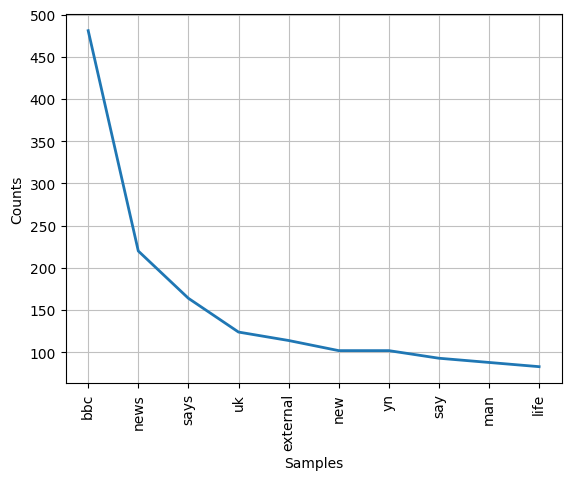

In [ ]:
if __name__ == "__main__":
    # Load the CSV file into a DataFrame
    df = pd.read_csv(dataset_path)

    # Extract the 'text' column from the DataFrame
    news_text = ' '.join(df['Content'].astype(str).tolist())

    # Perform word frequency analysis
    frequency_distribution = word_frequency_analysis(news_text)

    # Plot the word frequency distribution
    plot_word_frequency(frequency_distribution)

### **1. Text Analysis**
**1.2. Sentiment Analysis:** Determine the sentiment (positive, negative, neutral) of each article.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Assuming you have the necessary imports and the DataFrame
df = pd.read_csv(dataset_path)

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    # Check if the text is not NaN
    if pd.notna(text):
        # Get compound sentiment score
        sentiment_score = sia.polarity_scores(text)['compound']

        # Classify as positive, negative, or neutral based on the compound score
        if sentiment_score >= 0.05:
            return 'positive'
        elif sentiment_score <= -0.05:
            return 'negative'
        else:
            return 'neutral'
    else:
        # Return 'neutral' for NaN values
        return 'neutral'

# Apply sentiment analysis to the 'text' column and create a new 'sentiment' column
df['sentiment'] = df['Content'].apply(get_sentiment_polarity)

# Display the dataframe with sentiment analysis results
print(df[['Content', 'sentiment']])

                                              Content sentiment
0   Sunak sees off Tory revolt over Rwanda bill Is...  positive
1    The US president issues his strongest critici...  negative
2    Flagship bill passes its first Commons hurdle...  negative
3    The man who died on the vessel, moored off Do...  negative
4    Emma Artis's partner was convicted of domesti...  negative
..                                                ...       ...
91  Unions call for immediate pause to Ofsted The ...  negative
92  Israel losing global support over bombing - Bi...  negative
93  How can I win the rental property race? What a...  positive
94  Zelensky pleads for more US help amid aid stan...  negative
95  Climate talks run through night as countries s...  positive

[96 rows x 2 columns]


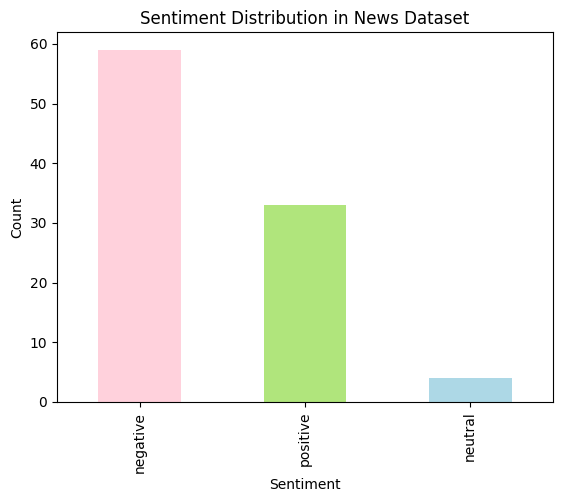

In [ ]:
# Define pastel colors
pastel_colors = ['#FFD1DC', '#B0E57C', '#ADD8E6']

# Plot the sentiment distribution with pastel colors
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=pastel_colors)
plt.title('Sentiment Distribution in News Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### **1. Text Analysis**
**1.3. Topic Modeling:** Use techniques like Latent Dirichlet Allocation (LDA) to discover topics within the dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Preprocess the text data
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(text):
    # Check if the text is not NaN or other non-string types
    if isinstance(text, str):
        words = word_tokenize(text)
        words = [porter.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
        return words
    else:
        # If non-string, return an empty list or handle accordingly
        return []

df['processed_text'] = df['Content'].apply(preprocess_text)

# Create a bag-of-words representation
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(df['processed_text'])

# Topic modeling using Latent Dirichlet Allocation (LDA)
num_topics = 5  # You can adjust the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display the topics and associated words
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_keywords)}")

# Alternatively, you can use Gensim for topic modeling
dictionary = corpora.Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]
lda_gensim = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

# Display the topics and associated words using Gensim
pprint(lda_gensim.print_topics())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic #1: yn, bbc, video, r, ar, wedi, ei, mewn, mae, car
Topic #2: bbc, news, ni, scotland, say, ukrain, abus, inquiri, talk, health
Topic #3: bbc, say, gaza, news, uk, extern, guernsey, firm, claim, report
Topic #4: bbc, say, news, plan, man, accus, low, death, die, climat
Topic #5: bbc, rwanda, say, pm, vote, mp, news, polit, labour, common
[(0,
  '0.014*"extern" + 0.013*"low" + 0.011*"bbc" + 0.010*"jersey" + '
  '0.008*"decemb" + 0.008*"high" + 0.008*"guernsey" + 0.008*"facebook" + '
  '0.008*"tiktok" + 0.007*"call"'),
 (1,
  '0.023*"bbc" + 0.020*"news" + 0.013*"say" + 0.013*"ni" + 0.008*"uk" + '
  '0.007*"correspond" + 0.007*"busi" + 0.006*"air" + 0.006*"worker" + '
  '0.006*"inquiri"'),
 (2,
  '0.013*"say" + 0.013*"bbc" + 0.012*"ukrain" + 0.010*"news" + 0.009*"death" + '
  '0.008*"vessel" + 0.008*"life" + 0.007*"pay" + 0.007*"man" + 0.007*"die"'),
 (3,
  '0.022*"bbc" + 0.011*"say" + 0.010*"yn" + 0.008*"news" + 0.008*"mp" + '
  '0.007*"rwanda" + 0.006*"labour" + 0.006*"pm" + 0.006

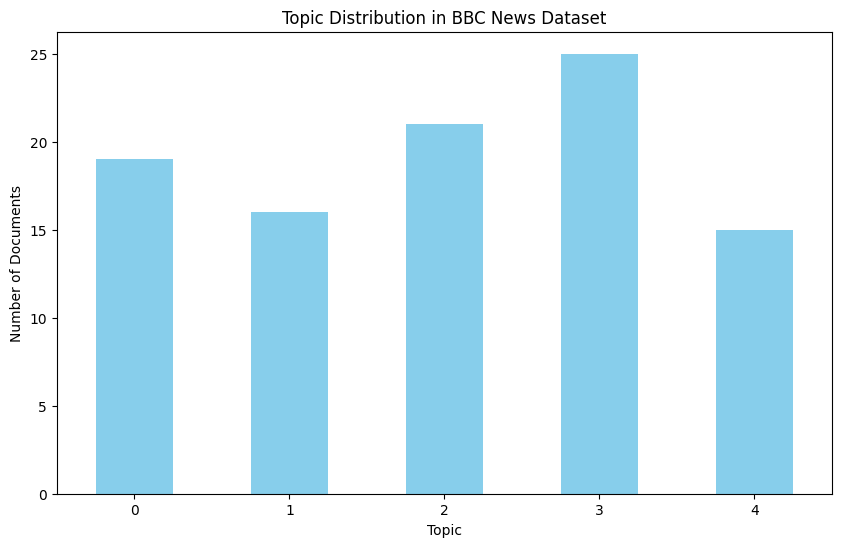

In [ ]:
import matplotlib.pyplot as plt

# Get the topic distribution for each document
lda_output = lda.transform(X)

# Choose the dominant topic for each document
dominant_topic = lda_output.argmax(axis=1)

# Count the number of documents for each topic
topic_counts = pd.Series(dominant_topic).value_counts()

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
topic_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Topic Distribution in BBC News Dataset')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=0)
plt.show()

## **2. Time Series Analysis**
**2.1. Temporal Trends**: Analyze how news coverage has evolved over time. Identify patterns, spikes, or recurring themes.

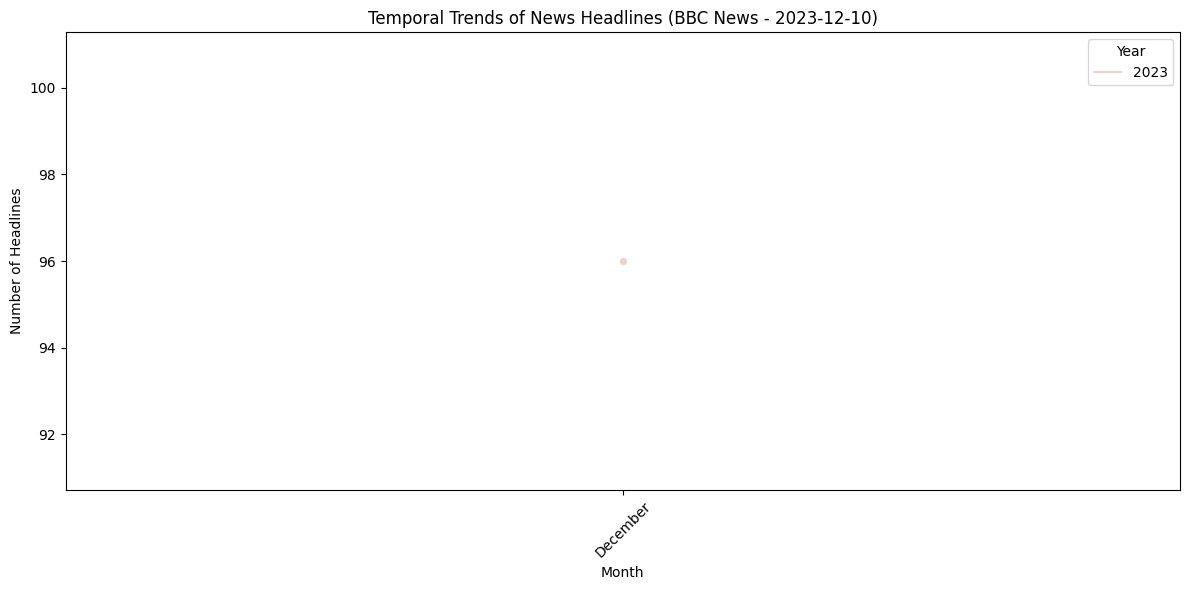

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(dataset_path)

# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Group by year and month, count headlines for each group
temporal_trends = df.groupby(['Year', 'Month']).size().reset_index(name='headline_count')

# Plot the temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='headline_count', hue='Year', data=temporal_trends, marker='o')
plt.title('Temporal Trends of News Headlines (BBC News - 2023-12-10)')
plt.xlabel('Month')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

### **3. Geospatial Analysis**
**3.1. Geographic Trends**: If your dataset includes location information, analyze news trends based on geographical regions.

In [ ]:
import pandas as pd

# Load the dataset
news_data = pd.read_csv(dataset_path)

# Display basic information about the dataset
print(news_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      96 non-null     object
 1   URL       96 non-null     object
 2   Country   96 non-null     object
 3   Category  96 non-null     object
 4   Headline  92 non-null     object
 5   Content   93 non-null     object
dtypes: object(6)
memory usage: 4.6+ KB
None


In [ ]:
# Display the first few rows of the dataset
news_data.head()

,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...
2,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...
3,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do..."
4,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...


In [ ]:
# Analyze geographic trends
geo_trends = news_data['Country'].value_counts()
print("Geographic Trends:")
print(geo_trends)

Geographic Trends:
 United Kingdom            39
United Kingdom             12
 Scotland                   6
 Wales                      6
 Northern Ireland           3
 Isle of Man                3
 Guernsey                   3
 Jersey                     3
 Israel                     3
 Ukraine                    3
 England                    3
Scotland                    2
Guernsey                    1
Israel                      1
Science and Environment     1
Jersey                      1
England                     1
Isle of Man                 1
Cymru Fyw                   1
Northern Ireland            1
Wales                       1
Ukraine                     1
Name: Country, dtype: int64


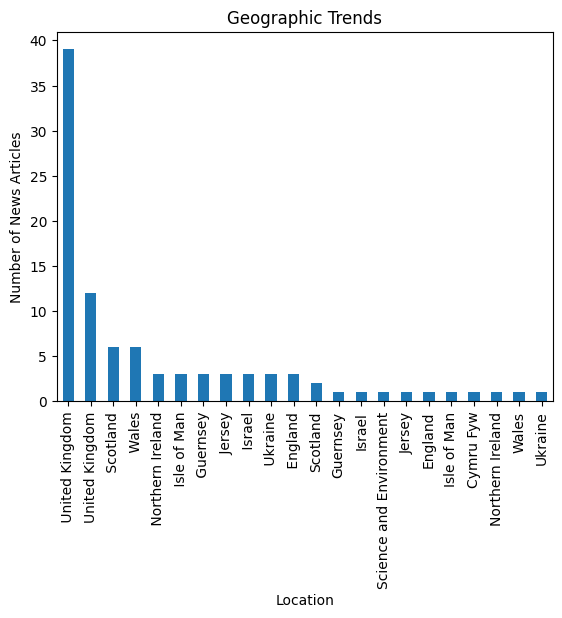

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'location' is a categorical variable
geo_trends.plot(kind='bar', title='Geographic Trends')
plt.xlabel('Location')
plt.ylabel('Number of News Articles')
plt.show()

### **3. Geospatial Analysis**
**3.2. Mapping**: Create visualizations of news coverage on a map.

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
print("Original DataFrame:")
df.head()

Original DataFrame:


,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...
2,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...
3,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do..."
4,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...


In [ ]:
# For example, let's say you want to map a 'category' column to numeric values
category_mapping = {'politics': 0, 'sports': 1, 'entertainment': 2, 'technology': 3}
df['Category Numeric'] = df['Category'].map(category_mapping)

# Save the modified DataFrame back to a new CSV file
output_file_path = "/content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/BBC_News_Num.csv"
df.to_csv(output_file_path, index=False)

print(f"\nModified DataFrame saved to {output_file_path}")


Modified DataFrame saved to /content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/BBC_News_Num.csv


In [ ]:
# Display the modified DataFrame
print("\nModified DataFrame with Numeric Category:")
df.head()


Modified DataFrame with Numeric Category:


,Date,URL,Country,Category,Headline,Content,Category Numeric
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...,NaN
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...,NaN
2,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...,NaN
3,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do...",NaN
4,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...,NaN


### **4. Categorization and Classification**
**4.1. Topic Categorization**: Categorize news articles into topics or themes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

In [ ]:
# Assuming your dataset has 'text' and 'category' columns
X = df['Content']
y = df['Category']

# Handle missing values (replace NaN with an empty string)
X = X.fillna('')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the text data into a bag-of-words representation
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

In [ ]:
# Evaluate the performance
print("\033[1mPerformance Report\033[0m\n")
accuracy = accuracy_score(y_test, y_pred)
print(f"\033[1mAccuracy:\033[0m {accuracy:.2f}")

# Calculate accuracy as a percentage
accuracy_percentage = accuracy * 100

# Print accuracy as a percentage
print(f"\n\033[1mAccuracy Percentage:\033[0m {accuracy_percentage:.2f}%")

# Print the classification report with zero_division='warn'
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_test, y_pred, zero_division='warn'))

print("\n\033[1mConfusion Matrix:\033[0m")
print(confusion_matrix(y_test, y_pred), "\n\n")

Performance Report

Accuracy: 0.85

Accuracy Percentage: 85.00%

Classification Report:
                         precision    recall  f1-score   support

               Business       1.00      1.00      1.00         1
         Cost of Living       0.00      0.00      0.00         0
 Entertainment and Arts       1.00      1.00      1.00         3
                 Health       1.00      1.00      1.00         2
                   News       0.90      1.00      0.95         9
             Technology       0.00      0.00      0.00         0
                    War       1.00      1.00      1.00         2
                Finance       0.00      0.00      0.00         1
                   News       0.00      0.00      0.00         1
             Technology       0.00      0.00      0.00         1

               accuracy                           0.85        20
              macro avg       0.49      0.50      0.49        20
           weighted avg       0.81      0.85      0.83        20


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

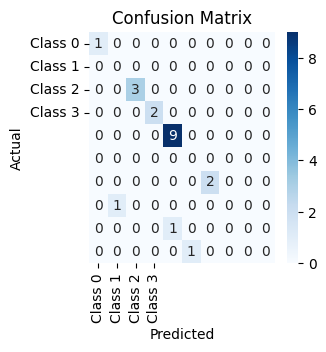

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test and y_pred
# y_test: true labels, y_pred: predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **4. Categorization and Classification**
**4.2. Fake News Detection**: If applicable, build a model to identify potentially misleading or fake news.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head()

,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...
2,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...
3,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do..."
4,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...


In [ ]:
'''
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['Label'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
'''

"\n# Split the dataset into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(df['Content'], df['Label'], test_size=0.2, random_state=42)\n\n# Create a TfidfVectorizer\ntfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)\n\n# Fit and transform the training set\nX_train_tfidf = tfidf_vectorizer.fit_transform(X_train)\n\n# Transform the testing set\nX_test_tfidf = tfidf_vectorizer.transform(X_test)\n\n# Create a Multinomial Naive Bayes classifier\nnb_classifier = MultinomialNB()\n\n# Train the classifier\nnb_classifier.fit(X_train_tfidf, y_train)\n\n# Make predictions on the test set\npredictions = nb_classifier.predict(X_test_tfidf)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, predictions)\nconf_matrix = confusion_matrix(y_test, predictions)\nclassification_rep = classification_report(y_test, predictions)\n"

In [ ]:
'''
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
'''

'\nprint(f"Accuracy: {accuracy:.2f}")\nprint("\nConfusion Matrix:")\nprint(conf_matrix)\nprint("\nClassification Report:")\nprint(classification_rep)\n'

### **5. Entity Recognition**
**5.1. Named Entity Recognition (NER)**: Extract entities such as people, organizations, locations, and more from the news articles.

In [ ]:
import pandas as pd
import spacy

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Load the news dataset
df = pd.read_csv(dataset_path)

# Handle NaN values in the "Content" column
df['Content'] = df['Content'].fillna('')  # Replace NaN values with an empty string

# Function to perform Named Entity Recognition on a text
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply Named Entity Recognition to the entire dataset
df['Ner Results'] = df['Content'].apply(perform_ner)

# Save the results to a new CSV file
output_path = "/content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/BBC_News_NER_Results.csv"
df.to_csv(output_path, index=False)

print(f"Named Entity Recognition results saved to {output_path}")

Named Entity Recognition results saved to /content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/BBC_News_NER_Results.csv


In [ ]:
# Load the news dataset
df = pd.read_csv(dataset_path)
print(df.shape, "\n")
df

(96, 6) 



,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...
2,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...
3,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do..."
4,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...
...,...,...,...,...,...,...
91,2023-12-13,https://www.bbc.co.uk/news/education,United Kingdom,Education,Unions call for immediate pause,Unions call for immediate pause to Ofsted The ...
92,2023-12-13,https://www.bbc.co.uk/news/topics/c2vdnvdg6xxt,Israel,War,Israel losing global support over,Israel losing global support over bombing - Bi...
93,2023-12-13,https://www.bbc.co.uk/news/topics/cljev4jz3pjt,United Kingdom,Cost of Living,How can I win the,How can I win the rental property race? What a...
94,2023-12-13,https://www.bbc.co.uk/news/topics/c1vw6q14rzqt,Ukraine,War,Zelensky pleads for more US,Zelensky pleads for more US help amid aid stan...


### **6. Network Analysis**
**6.1. Authorship Network**: Explore connections between different authors or contributors.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head()

,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...
2,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...
3,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do..."
4,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...


In [ ]:
'''
# Create an authorship network
def build_authorship_network(dataframe):
    G = nx.Graph()

    # Add nodes and edges based on the 'Author' column
    for _, row in dataframe.iterrows():
        authors = row['Author'].split(',')
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                author1, author2 = authors[i].strip(), authors[j].strip()
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)

    return G

# Plot the authorship network
def plot_authorship_network(graph):
    pos = nx.spring_layout(graph)
    weights = [graph[u][v]['weight'] for u, v in graph.edges()]

    nx.draw(graph, pos, with_labels=True, font_size=8, node_size=30, font_color='black', font_weight='bold', width=weights, edge_color=weights, edge_cmap=plt.cm.Blues)
    plt.title("Authorship Network")
    plt.show()

# Build and plot the authorship network
authorship_network = build_authorship_network(df)
plot_authorship_network(authorship_network)
'''

'\n# Create an authorship network\ndef build_authorship_network(dataframe):\n    G = nx.Graph()\n\n    # Add nodes and edges based on the \'Author\' column\n    for _, row in dataframe.iterrows():\n        authors = row[\'Author\'].split(\',\')\n        for i in range(len(authors)):\n            for j in range(i + 1, len(authors)):\n                author1, author2 = authors[i].strip(), authors[j].strip()\n                if G.has_edge(author1, author2):\n                    G[author1][author2][\'weight\'] += 1\n                else:\n                    G.add_edge(author1, author2, weight=1)\n\n    return G\n\n# Plot the authorship network\ndef plot_authorship_network(graph):\n    pos = nx.spring_layout(graph)\n    weights = [graph[u][v][\'weight\'] for u, v in graph.edges()]\n\n    nx.draw(graph, pos, with_labels=True, font_size=8, node_size=30, font_color=\'black\', font_weight=\'bold\', width=weights, edge_color=weights, edge_cmap=plt.cm.Blues)\n    plt.title("Authorship Network")\

In [ ]:
df.columns.tolist()

['Date', 'URL', 'Country', 'Category', 'Headline', 'Content']

### **6. Network Analysis**
**6.2. Co-occurrence Analysis**: Identify relationships between entities mentioned in the articles.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Combine 'Headline' and 'Content' columns for text analysis
df['Combined_Text'] = df['Headline'].fillna('') + ' ' + df['Content'].fillna('')

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df['Combined_Text'].astype(str))  # Handle potential NaN values

# Calculate cosine similarity between terms
cosine_sim = cosine_similarity(dtm.transpose())

# Get feature names (terms) from the vectorizer
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for the co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(cosine_sim, index=terms, columns=terms)

# Display the co-occurrence matrix
co_occurrence_matrix

,00,000,00locally,00m,00the,01,03,05,10,100,...,zephaniah,zero,zoe,zone,àirde,àrd,ôl,ùghdarras,ùr,ùrcchàtte
00,1.000000,0.051848,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.324443,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.051848,1.000000,0.0,0.0,0.051848,0.051848,0.051848,0.051848,0.185037,0.063500,...,0.155543,0.204569,0.155543,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00locally,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
00m,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,...,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0
00the,1.000000,0.051848,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.324443,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
àrd,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,...,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0
ôl,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ùghdarras,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,...,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0
ùr,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,...,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0


### **7. User Engagement Analysis**
**7.1. Popularity Analysis**: Analyze which articles or topics are more popular based on metrics like views, comments, or shares.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("\nInfo:")
print(df.info())

# Display the first few rows of the dataset
print("\nHead:")
print(df.head())

# Popularity Analysis Example: Grouping by Category and Counting the Number of Articles
category_counts = df['Category'].value_counts()
print("\nCategory Counts:")
print(category_counts)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      96 non-null     object
 1   URL       96 non-null     object
 2   Country   96 non-null     object
 3   Category  96 non-null     object
 4   Headline  92 non-null     object
 5   Content   93 non-null     object
dtypes: object(6)
memory usage: 4.6+ KB
None

Head:
         Date                                  URL          Country Category  \
0  2023-12-13               https://www.bbc.co.uk/   United Kingdom     News   
1  2023-12-13           https://www.bbc.co.uk/news   United Kingdom     News   
2  2023-12-13        https://www.bbc.co.uk/news/uk   United Kingdom     News   
3  2023-12-13   https://www.bbc.co.uk/news/england          England     News   
4  2023-12-13  https://www.bbc.co.uk/news/scotland         Scotland     News   

                             Headline  \
0          Su

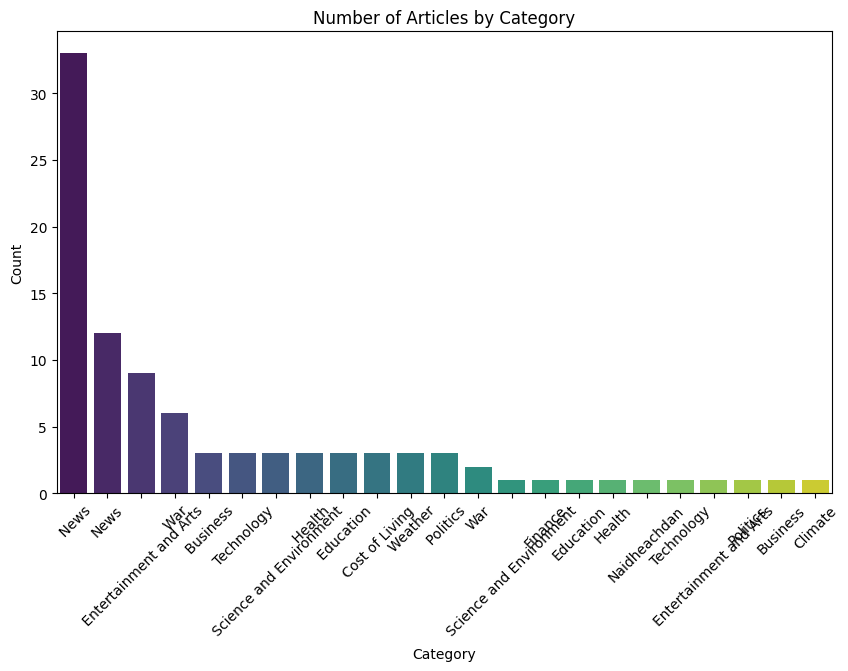

In [ ]:
# Plotting Category Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Number of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **7. User Engagement Analysis**
**7.2. Social Media Impact**: If available, analyze the impact of news articles on social media platforms.

In [ ]:
'''
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(dataset_path)

# Add a new column for social media impact (you can replace this with the actual social media impact data)
df['Social_Media_Impact'] = [100, 200, 50]  # Replace with your actual social media impact data

# Display the updated DataFrame
print(df)

# Save the DataFrame with the social media impact column to a new CSV file
output_csv_file_path = 'BBC_News_Social_Media_Impact'
df.to_csv(output_csv_file_path, index=False)

print(f"CSV file '{output_csv_file_path}' created with Social Media Impact.")

'''

'\nimport pandas as pd\n\n# Read the CSV file into a Pandas DataFrame\ndf = pd.read_csv(dataset_path)\n\n# Add a new column for social media impact (you can replace this with the actual social media impact data)\ndf[\'Social_Media_Impact\'] = [100, 200, 50]  # Replace with your actual social media impact data\n\n# Display the updated DataFrame\nprint(df)\n\n# Save the DataFrame with the social media impact column to a new CSV file\noutput_csv_file_path = \'BBC_News_Social_Media_Impact\'\ndf.to_csv(output_csv_file_path, index=False)\n\nprint(f"CSV file \'{output_csv_file_path}\' created with Social Media Impact.")\n\n'

### **8. Content Recommendation**
**8.1. Recommendation System**: Build a recommendation system to suggest related articles based on user preferences or content similarity.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Check the data
df.head()

,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...
2,2023-12-13,https://www.bbc.co.uk/news/uk,United Kingdom,News,Flagship bill passes its first,Flagship bill passes its first Commons hurdle...
3,2023-12-13,https://www.bbc.co.uk/news/england,England,News,The man who died on,"The man who died on the vessel, moored off Do..."
4,2023-12-13,https://www.bbc.co.uk/news/scotland,Scotland,News,Emma Artis's partner was convicted,Emma Artis's partner was convicted of domesti...


In [ ]:
# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Content'].fillna(''))

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on the given article index
def get_recommendations(index, cosine_sim=cosine_sim):
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar articles (excluding itself)
    article_indices = [i[0] for i in sim_scores]
    return df['Headline'].iloc[article_indices]

# Example: Get recommendations for the article at index 0
index_to_check = 0
recommendations = get_recommendations(index_to_check)

In [ ]:
# Display the recommendations
print(f"\nRecommendations for '{df['Headline'].iloc[index_to_check]}':")
print(recommendations)


Recommendations for 'Sunak sees off Tory revolt':
24         Sunak sees off Tory revolt
72         Sunak sees off Tory revolt
48     Rishi Sunak sees off rebellion
21                  How can I win the
45                  How can I win the
93                  How can I win the
69                  How can I win the
50         MPs vote through the prime
15    Accused thief not talking, says
39    Accused thief not talking, says
Name: Headline, dtype: object


### **9. Language Processing**
**9.1. Language Translation**: If the dataset contains articles in multiple languages, you can explore translation services or analyze language-specific patterns.

In [ ]:
pip install pandas googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator
import time

In [ ]:
# Function to translate text using googletrans
def translate_text(text, target_language='en'):
    try:
        translator = Translator()
        translation = translator.translate(text, dest=target_language)
        return translation.text if translation.text else text
    except Exception as e:
        print(f"Translation error: {e}")
        return text  # Return the original text if translation fails

# Rest of your code remains unchanged
df = pd.read_csv(dataset_path)
df['Content'] = df['Content'].apply(translate_text)
df.to_csv('/content/drive/MyDrive/2. MSc/Colab Notebooks/My Projects - Portfolio/Web Scraping for Data Analysts/BBC_News_Language_Processing', index=False)
print("Dataset created and saved successfully.")

Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Translation error: the JSON object must be str, bytes or bytearray, not NoneType
Dataset created and saved successfully.


### **10. Data Visualization**
**10.1. Word Clouds**: Create word clouds to visually represent the most common words.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Load your dataset
df = pd.read_csv(dataset_path)

# Assuming your text is in a column named 'text'
text_data = df['Content'].astype(str)

In [ ]:
# Remove stopwords and tokenize
stop_words = set(stopwords.words('english'))
text_data = text_data.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

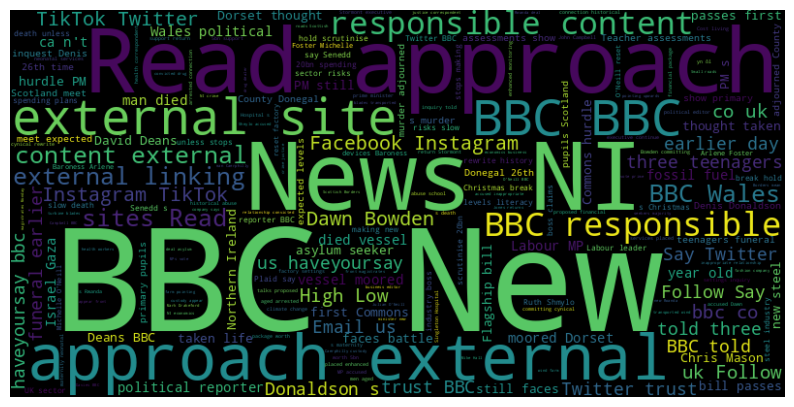

In [ ]:
# Concatenate all text data into a single string
all_text = ' '.join(text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **10. Data Visualization**
**10.2. Graphs and Charts**: Use bar charts, line charts, or other visualizations to represent trends or comparisons.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head(2)

,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...


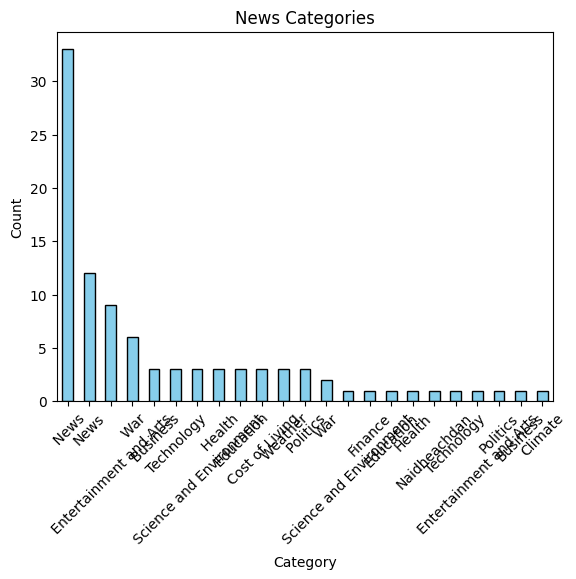

In [ ]:
# Bar chart for news categories
category_counts = df['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

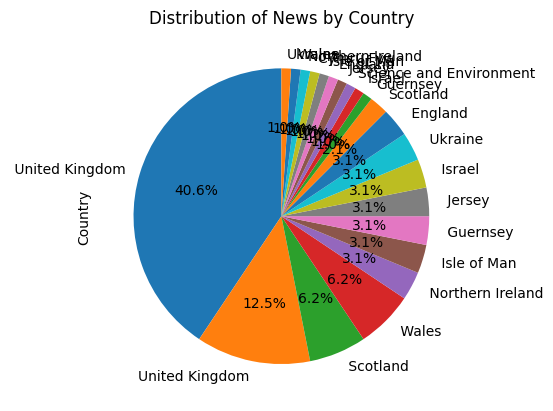

In [ ]:
# Pie chart for country distribution
country_counts = df['Country'].value_counts()
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of News by Country')
plt.show()

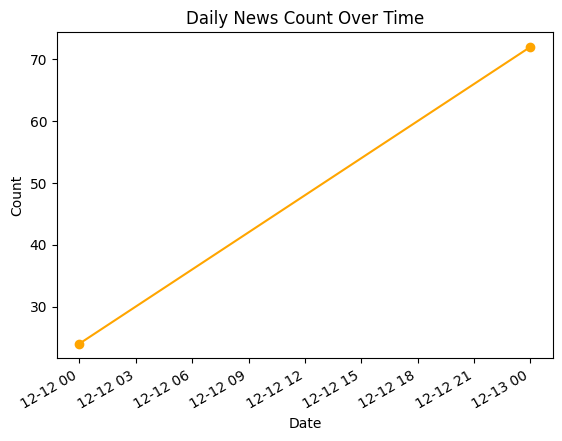

In [ ]:
# Line chart for news count over time
df['Date'] = pd.to_datetime(df['Date'])
daily_news_count = df.groupby('Date').size()
daily_news_count.plot(kind='line', color='orange', marker='o')
plt.title('Daily News Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

### **11. Predictive Modeling**
**11.1. Prediction of Trends**: Use machine learning models to predict future trends in news coverage based on historical data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head(2)

,Date,URL,Country,Category,Headline,Content
0,2023-12-13,https://www.bbc.co.uk/,United Kingdom,News,Sunak sees off Tory revolt,Sunak sees off Tory revolt over Rwanda bill Is...
1,2023-12-13,https://www.bbc.co.uk/news,United Kingdom,News,The US president issues his,The US president issues his strongest critici...


In [ ]:
# Handle missing values in the 'Content' column
df['Content'].fillna('', inplace=True)

In [ ]:
# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['Content'], df['Category'], test_size=0.2, random_state=42)

# Build a text classification pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
report = classification_report(test_labels, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"\033[1mAccuracy:\033[0m {accuracy:.2f}")
# Calculate accuracy as a percentage
accuracy_percentage = accuracy * 100

# Print accuracy as a percentage
print(f"\n\033[1mAccuracy Percentage:\033[0m {accuracy_percentage:.2f}%")

print('\n\033[1mClassification Report:\033[0m\n')
print(report)

Accuracy: 0.60

Accuracy Percentage: 60.00%

Classification Report:

                         precision    recall  f1-score   support

               Business       0.00      0.00      0.00         1
 Entertainment and Arts       1.00      1.00      1.00         3
                 Health       0.00      0.00      0.00         2
                   News       0.53      1.00      0.69         9
                    War       0.00      0.00      0.00         2
                Finance       0.00      0.00      0.00         1
                   News       0.00      0.00      0.00         1
             Technology       0.00      0.00      0.00         1

               accuracy                           0.60        20
              macro avg       0.19      0.25      0.21        20
           weighted avg       0.39      0.60      0.46        20

